In [1]:
!pip install matplotlib

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


In [69]:
df= pd.read_csv('C:/Users/Harsh Patel/Desktop/Personal Projects/Energy Prediction/energy_dataset.csv/energy_dataset.csv')

In [70]:
df.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation waste  generation wind offshore  generation wind onshore  \
0  ...             196.0                       0.0                   6378.0   
1  ...             195.0                       0.0                   5890.0   
2  ...             196.0                       0.0                   5461.0   
3  ...             191.0                       0.0                   5238.0   
4  ...             189.0                       0.0                   4935.0   

   forecast solar day ahead  forecast wind offshore eday ahead  \
0                      17.0                                NaN   
1                      16.0                                NaN   
2                       8.0                                NaN   
3                       2.0                                NaN   
4                       9.0                                NaN   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  
0            50.10         65.41  
1            48.10         64.92  
2            47.33         64.48  
3            42.27         59.32  
4            38.41         56.04  

[5 rows x 29 columns]

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [72]:
df.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [73]:
df_copy= df.copy()

In [74]:
df_copy.drop(['generation hydro pumped storage aggregated'],axis=1, inplace= True)

In [75]:
df_copy.drop(['forecast wind offshore eday ahead', 'forecast solar day ahead', 'forecast wind onshore day ahead'], axis=1, inplace=True)


In [76]:
df_copy.head()

time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation fossil oil shale  generation fossil peat  generation geothermal  \
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   
4                          0.0                     0.0                    0.0   

   ...  generation other  generation other renewable  generation solar  \
0  ...              43.0                        73.0              49.0   
1  ...              43.0                        71.0              50.0   
2  ...              43.0                        73.0              50.0   
3  ...              43.0                        75.0              50.0   
4  ...              43.0                        74.0              42.0   

   generation waste  generation wind offshore  generation wind onshore  \
0             196.0                       0.0                   6378.0   
1             195.0                       0.0                   5890.0   
2             196.0                       0.0                   5461.0   
3             191.0                       0.0                   5238.0   
4             189.0                       0.0                   4935.0   

   total load forecast  total load actual  price day ahead  price actual  
0              26118.0            25385.0            50.10         65.41  
1              24934.0            24382.0            48.10         64.92  
2              23515.0            22734.0            47.33         64.48  
3              22642.0            21286.0            42.27         59.32  
4              21785.0            20264.0            38.41         56.04  

[5 rows x 25 columns]

In [77]:
df_copy.corr()

C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_16828\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


generation biomass  \
generation biomass                                     1.000000   
generation fossil brown coal/lignite                   0.229809   
generation fossil coal-derived gas                          NaN   
generation fossil gas                                 -0.021660   
generation fossil hard coal                            0.433522   
generation fossil oil                                  0.459530   
generation fossil oil shale                                 NaN   
generation fossil peat                                      NaN   
generation geothermal                                       NaN   
generation hydro pumped storage consumption           -0.044898   
generation hydro run-of-river and poundage            -0.284877   
generation hydro water reservoir                      -0.033675   
generation marine                                           NaN   
generation nuclear                                    -0.021279   
generation other                                       0.658488   
generation other renewable                            -0.560588   
generation solar                                      -0.004687   
generation waste                                      -0.346343   
generation wind offshore                                    NaN   
generation wind onshore                               -0.068658   
total load forecast                                    0.085216   
total load actual                                      0.083288   
price day ahead                                        0.108945   
price actual                                           0.142369   

                                             generation fossil brown coal/lignite  \
generation biomass                                                       0.229809   
generation fossil brown coal/lignite                                     1.000000   
generation fossil coal-derived gas                                            NaN   
generation fossil gas                                                    0.499808   
generation fossil hard coal                                              0.768710   
generation fossil oil                                                    0.314869   
generation fossil oil shale                                                   NaN   
generation fossil peat                                                        NaN   
generation geothermal                                                         NaN   
generation hydro pumped storage consumption                             -0.323771   
generation hydro run-of-river and poundage                              -0.525005   
generation hydro water reservoir                                        -0.229455   
generation marine                                                             NaN   
generation nuclear                                                      -0.008440   
generation other                                                         0.097600   
generation other renewable                                               0.104552   
generation solar                                                         0.040447   
generation waste                                                         0.282810   
generation wind offshore                                                      NaN   
generation wind onshore                                                 -0.434118   
total load forecast                                                      0.278503   
total load actual                                                        0.280461   
price day ahead                                                          0.567905   
price actual                                                             0.364088   

                                             generation fossil coal-derived gas  \
generation biomass                                                          NaN   
generation fossil brown coal/lignite                                        N

In [78]:
df_copy.isnull().sum()

time                                            0
generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil coal-derived gas             18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation fossil oil shale                    18
generation fossil peat                         18
generation geothermal                          18
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation marine                              19
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind offshore                       18


In [79]:
df_copy.shape

(35064, 25)

In [80]:
df_copy.interpolate(inplace=True,method='linear')

In [81]:
df_copy.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [82]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil coal-derived gas           35064 non-null  float64
 4   generation fossil gas                        35064 non-null  float64
 5   generation fossil hard coal                  35064 non-null  float64
 6   generation fossil oil                        35064 non-null  float64
 7   generation fossil oil shale                  35064 non-null  float64
 8   generation fossil peat                       35064 non-null  float64
 9   generation geothermal                        35064 non-null  float64
 10

In [83]:
df_copy['time']= pd.to_datetime(df_copy['time'], utc= True)

In [84]:
df_copy['generation from all sources']= df_copy['generation biomass'] + df_copy['generation fossil brown coal/lignite']+ df_copy['generation fossil coal-derived gas']+ df_copy['generation fossil gas']+ df_copy['generation fossil hard coal']+ df_copy['generation fossil oil']+ df_copy['generation fossil oil shale']+ df_copy['generation fossil peat']+ df_copy['generation geothermal']+ df_copy['generation hydro pumped storage consumption']+ df_copy['generation hydro run-of-river and poundage']+ df_copy['generation hydro water reservoir']+ df_copy['generation marine']+ df_copy['generation nuclear']+ df_copy['generation other']+ df_copy['generation other renewable']+ df_copy['generation solar'] + df_copy['generation waste']+  df_copy['generation wind offshore']+  df_copy['generation wind onshore'] 

In [85]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35064 non-null  float64            
 2   generation fossil brown coal/lignite         35064 non-null  float64            
 3   generation fossil coal-derived gas           35064 non-null  float64            
 4   generation fossil gas                        35064 non-null  float64            
 5   generation fossil hard coal                  35064 non-null  float64            
 6   generation fossil oil                        35064 non-null  float64            
 7   generation fossil oil shale                  35064 non-null  float64            
 8   generation fossil peat    

In [86]:
df_copy.drop(['generation biomass','generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore'], axis= 1, inplace= True) 

In [87]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   time                         35064 non-null  datetime64[ns, UTC]
 1   total load forecast          35064 non-null  float64            
 2   total load actual            35064 non-null  float64            
 3   price day ahead              35064 non-null  float64            
 4   price actual                 35064 non-null  float64            
 5   generation from all sources  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 1.6 MB


In [88]:
df_copy['time'].dtype

datetime64[ns, UTC]

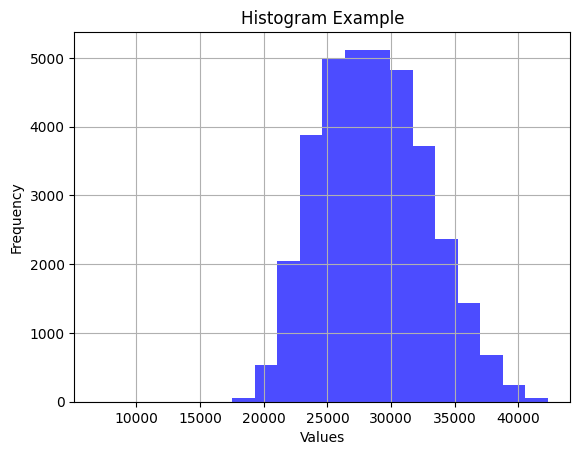

In [89]:
# data = np.random.randn(1000)  # Sample data

# Create a histogram
plt.hist(df_copy['generation from all sources'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

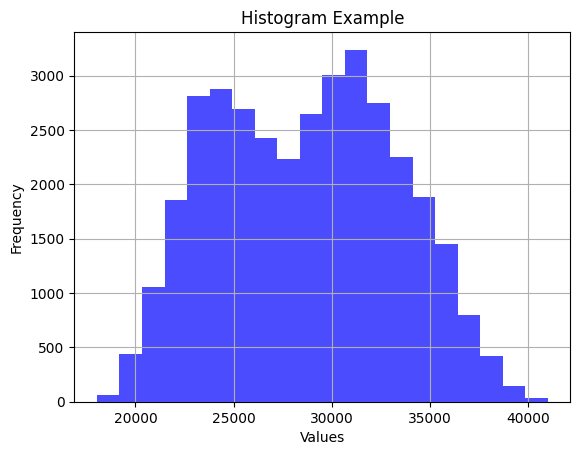

In [90]:
# data = np.random.randn(1000)  # Sample data

# Create a histogram
plt.hist(df_copy['total load actual'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

In [91]:
df_copy.corr()

C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_16828\382007831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_copy.corr()


total load forecast  total load actual  \
total load forecast                     1.000000           0.995096   
total load actual                       0.995096           1.000000   
price day ahead                         0.474649           0.474273   
price actual                            0.435864           0.435253   
generation from all sources             0.826238           0.829969   

                             price day ahead  price actual  \
total load forecast                 0.474649      0.435864   
total load actual                   0.474273      0.435253   
price day ahead                     1.000000      0.732155   
price actual                        0.732155      1.000000   
generation from all sources         0.250963      0.298998   

                             generation from all sources  
total load forecast                             0.826238  
total load actual                               0.829969  
price day ahead                                 0.250963  
price actual                                    0.298998  
generation from all sources                     1.000000

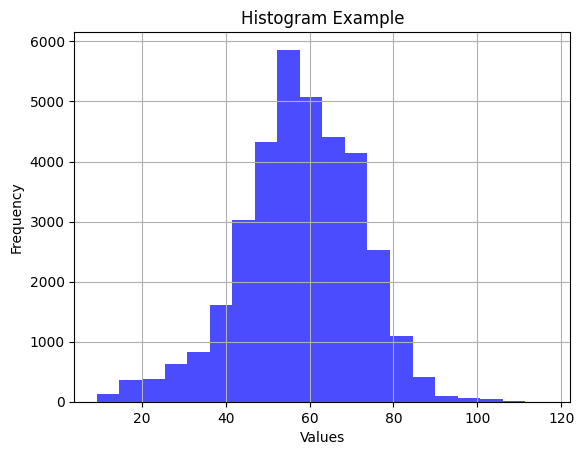

In [92]:
# data = np.random.randn(1000)  # Sample data

# Create a histogram
plt.hist(df_copy['price actual'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

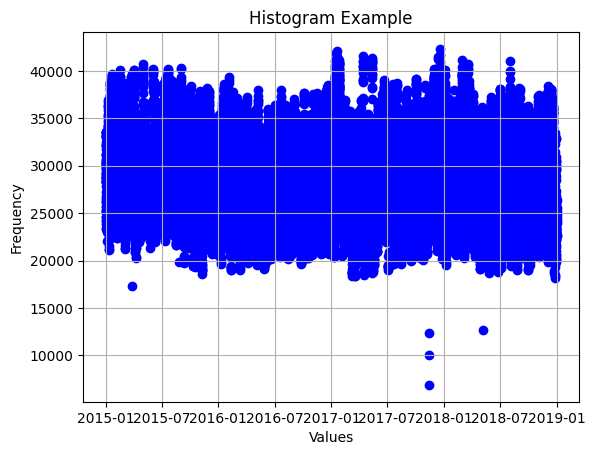

In [93]:
# data = np.random.randn(1000)  # Sample data
y= df_copy['generation from all sources']
x= df_copy['time']
# Create a histogram
plt.scatter(x, y, color='blue', marker='o', label='Data')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

In [94]:
df_copy.drop_duplicates(inplace=True)

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   time                         35064 non-null  datetime64[ns, UTC]
 1   total load forecast          35064 non-null  float64            
 2   total load actual            35064 non-null  float64            
 3   price day ahead              35064 non-null  float64            
 4   price actual                 35064 non-null  float64            
 5   generation from all sources  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 1.9 MB


In [96]:
df_copy.describe()

total load forecast  total load actual  price day ahead  price actual  \
count         35064.000000       35064.000000     35064.000000  35064.000000   
mean          28712.129962       28698.281385        49.874341     57.884023   
std            4594.100854        4575.828854        14.618900     14.204083   
min           18105.000000       18041.000000         2.060000      9.330000   
25%           24793.750000       24807.000000        41.490000     49.347500   
50%           28906.000000       28902.000000        50.520000     58.020000   
75%           32263.250000       32194.250000        60.530000     68.010000   
max           41390.000000       41015.000000       101.990000    116.800000   

       generation from all sources  
count                 35064.000000  
mean                  28639.080453  
std                    4186.310196  
min                    6899.000000  
25%                   25448.000000  
50%                   28456.000000  
75%                   31571.000000  
max                   42310.000000

# Setting the interquartile range for outlier removal.

In [97]:
Q1= df_copy['generation from all sources'].quantile(0.25)
Q3= df_copy['generation from all sources'].quantile(0.75)
Q1,Q3

(25448.0, 31571.0)

In [98]:
IQR= Q3-Q1
IQR

6123.0

In [99]:
lower_limit= Q1-1.5*IQR
upper_limit= Q3+1.5*IQR
lower_limit, upper_limit

(16263.5, 40755.5)

In [100]:
df_no_outlier= df_copy['generation from all sources'][(df_copy['generation from all sources']>lower_limit)& (df_copy['generation from all sources']<upper_limit)] 
df_no_outlier.head()

0    28251.0
1    27818.0
2    26796.0
3    25223.0
4    24620.0
Name: generation from all sources, dtype: float64

In [101]:
df_no_outlier.shape

(35019,)

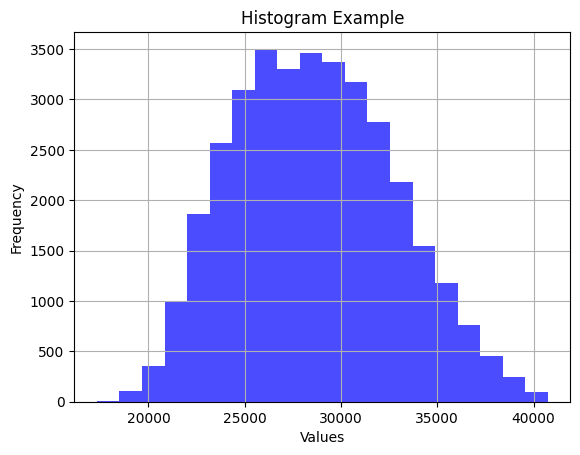

In [102]:
# data = np.random.randn(1000)  # Sample data

# Create a histogram
plt.hist(df_no_outlier, bins=20, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

In [103]:
df_copy['price actual'] = df_copy['price actual'].round(2)
df_copy['price actual']

0        65.41
1        64.92
2        64.48
3        59.32
4        56.04
         ...  
35059    77.02
35060    76.16
35061    74.30
35062    69.89
35063    69.88
Name: price actual, Length: 35064, dtype: float64

In [104]:
q1= df_copy['price actual'].quantile(0.25) 
q3= df_copy['price actual'].quantile(0.75)
q1,q3

(49.347500000000004, 68.01)

In [105]:
iqr= q3-q1
iqr

18.6625

In [106]:
lower_limit= q1-1.5*IQR
upper_limit= q3+1.5*IQR
lower_limit, upper_limit

(-9135.1525, 9252.51)

In [107]:
df_no_outlier_price= df_copy['price actual'][(df_copy['price actual']>lower_limit)& (df_copy['price actual']<upper_limit)] 
df_no_outlier_price.head()

0    65.41
1    64.92
2    64.48
3    59.32
4    56.04
Name: price actual, dtype: float64

In [108]:
df_no_outlier_price.shape

(35064,)

In [109]:
df_copy['total load actual'] = df_copy['total load actual'].round(2)
df_copy['total load actual']

0        25385.0
1        24382.0
2        22734.0
3        21286.0
4        20264.0
          ...   
35059    30653.0
35060    29735.0
35061    28071.0
35062    25801.0
35063    24455.0
Name: total load actual, Length: 35064, dtype: float64

In [110]:
i1= df_copy['total load actual'].quantile(0.25) 
i3= df_copy['total load actual'].quantile(0.75)
i1,i3

(24807.0, 32194.25)

In [111]:
iqr_3= i3-i1
iqr_3

7387.25

In [112]:
lower_limit= i1-1.5*iqr_3
upper_limit= i3+1.5*iqr_3
lower_limit, upper_limit

(13726.125, 43275.125)

In [113]:
df_no_outlier_load= df_copy['total load actual'][(df_copy['total load actual']>lower_limit)& (df_copy['total load actual']<upper_limit)] 
df_no_outlier_load.head()

0    25385.0
1    24382.0
2    22734.0
3    21286.0
4    20264.0
Name: total load actual, dtype: float64

In [114]:
df_no_outlier_load.shape

(35064,)

# Energy Price Prediction

In [115]:
df_copy.isnull().sum()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   time                         35064 non-null  datetime64[ns, UTC]
 1   total load forecast          35064 non-null  float64            
 2   total load actual            35064 non-null  float64            
 3   price day ahead              35064 non-null  float64            
 4   price actual                 35064 non-null  float64            
 5   generation from all sources  35064 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(5)
memory usage: 1.9 MB


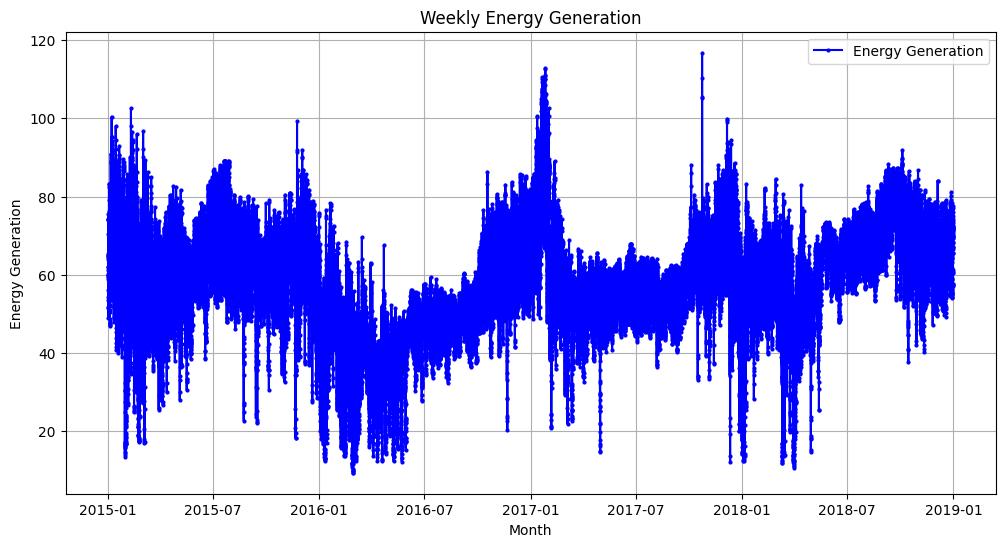

In [116]:
# Resample the data to weekly frequency (e.g., summing the data for each week)
time= df_copy['time']
generation= df_copy['price actual']
# Create a bar plot to visualize weekly seasonality
plt.figure(figsize=(12, 6))
plt.plot(time, generation, linestyle='-', marker='o', markersize=2, color='b', label='Energy Generation')
plt.title('Weekly Energy Generation')
plt.xlabel('Month')
plt.ylabel('Energy Generation')
plt.grid(True) 
plt.legend()
plt.show()


In [117]:
df_price_prediction = pd.concat([df_copy['time'], df_no_outlier_price], axis=1)
df_price_prediction.head()

time  price actual
0 2014-12-31 23:00:00+00:00         65.41
1 2015-01-01 00:00:00+00:00         64.92
2 2015-01-01 01:00:00+00:00         64.48
3 2015-01-01 02:00:00+00:00         59.32
4 2015-01-01 03:00:00+00:00         56.04

In [118]:
df_price_prediction.isnull().sum()

time            0
price actual    0
dtype: int64

In [119]:
conditions = [
    (df_price_prediction['time'].dt.month >= 1) & (df_price_prediction['time'].dt.month <= 3),  # Winter
    (df_price_prediction['time'].dt.month >= 4) & (df_price_prediction['time'].dt.month <= 6),  # Spring
    (df_price_prediction['time'].dt.month >= 7) & (df_price_prediction['time'].dt.month <= 9),  # Summer
    (df_price_prediction['time'].dt.month >= 10) & (df_price_prediction['time'].dt.month <= 12)  # Autumn
]

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

df_price_prediction['seasons'] = np.select(conditions, seasons, default='Unknown')

print(df_price_prediction)


                           time  price actual seasons
0     2014-12-31 23:00:00+00:00         65.41  Autumn
1     2015-01-01 00:00:00+00:00         64.92  Winter
2     2015-01-01 01:00:00+00:00         64.48  Winter
3     2015-01-01 02:00:00+00:00         59.32  Winter
4     2015-01-01 03:00:00+00:00         56.04  Winter
...                         ...           ...     ...
35059 2018-12-31 18:00:00+00:00         77.02  Autumn
35060 2018-12-31 19:00:00+00:00         76.16  Autumn
35061 2018-12-31 20:00:00+00:00         74.30  Autumn
35062 2018-12-31 21:00:00+00:00         69.89  Autumn
35063 2018-12-31 22:00:00+00:00         69.88  Autumn

[35064 rows x 3 columns]


In [120]:
df_price_prediction

time  price actual seasons
0     2014-12-31 23:00:00+00:00         65.41  Autumn
1     2015-01-01 00:00:00+00:00         64.92  Winter
2     2015-01-01 01:00:00+00:00         64.48  Winter
3     2015-01-01 02:00:00+00:00         59.32  Winter
4     2015-01-01 03:00:00+00:00         56.04  Winter
...                         ...           ...     ...
35059 2018-12-31 18:00:00+00:00         77.02  Autumn
35060 2018-12-31 19:00:00+00:00         76.16  Autumn
35061 2018-12-31 20:00:00+00:00         74.30  Autumn
35062 2018-12-31 21:00:00+00:00         69.89  Autumn
35063 2018-12-31 22:00:00+00:00         69.88  Autumn

[35064 rows x 3 columns]

In [121]:
df_price_prediction = df_price_prediction[df_price_prediction['time'] != '2014-12-31 23:00:00+00:00']


In [122]:
df_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35063 entries, 1 to 35063
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   time          35063 non-null  datetime64[ns, UTC]
 1   price actual  35063 non-null  float64            
 2   seasons       35063 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 1.1+ MB


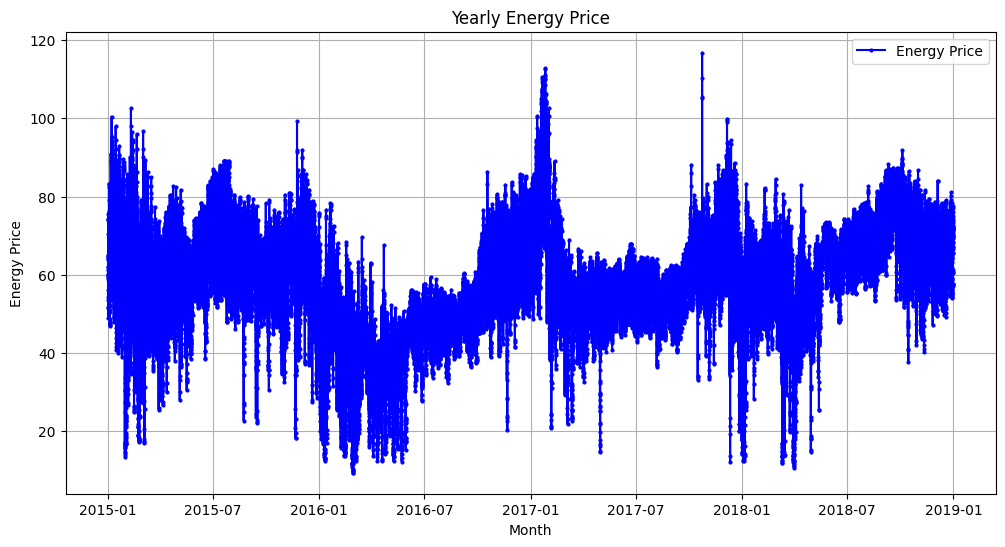

In [123]:
# Resample the data to weekly frequency (e.g., summing the data for each week)
time= df_price_prediction['time']
generation= df_price_prediction['price actual']
# Create a bar plot to visualize weekly seasonality
plt.figure(figsize=(12, 6))
plt.plot(time, generation, linestyle='-', marker='o', markersize=2, color='b', label='Energy Price')
plt.title('Yearly Energy Price')
plt.xlabel('Month')
plt.ylabel('Energy Price')
plt.grid(True) 
plt.legend()
plt.show()

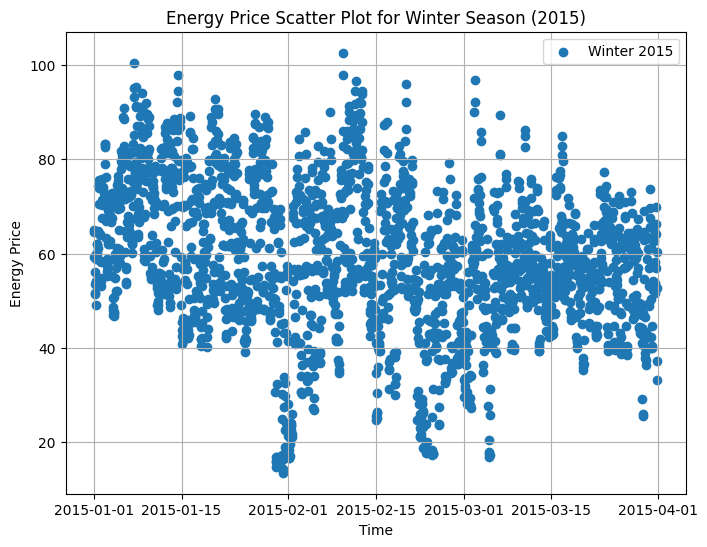

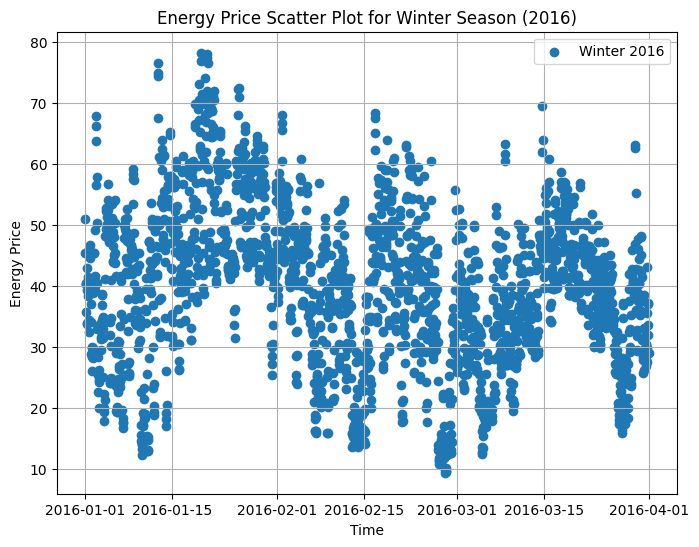

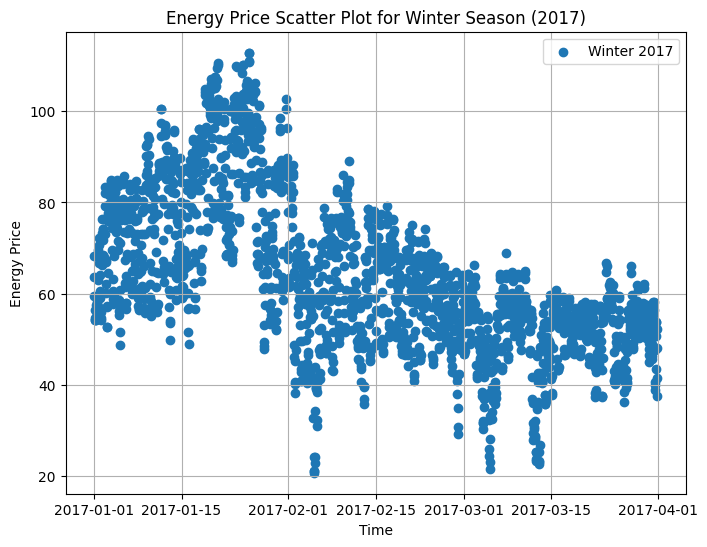

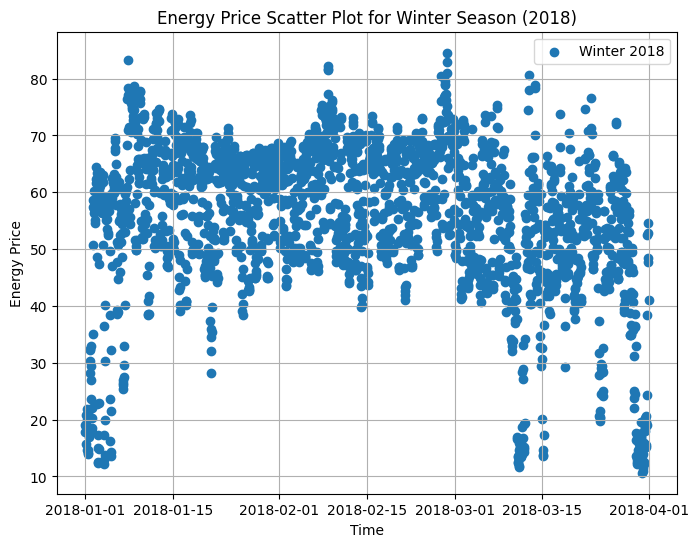

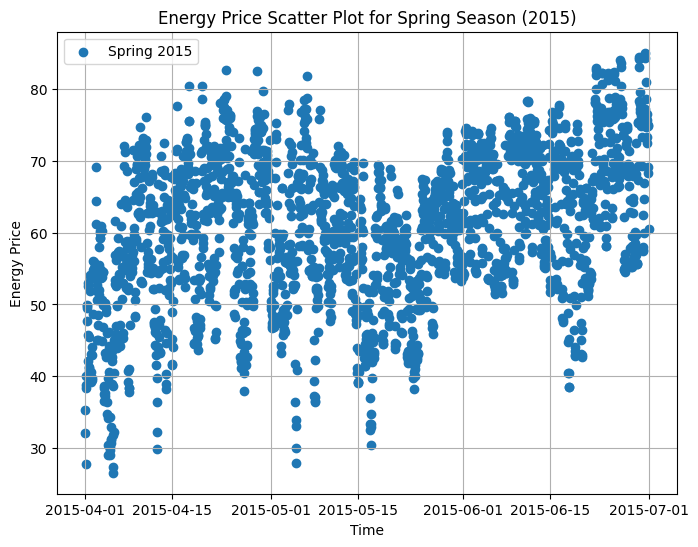

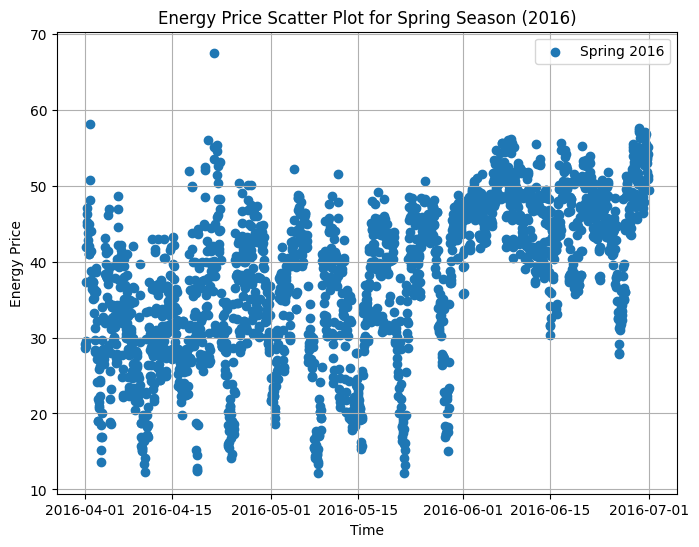

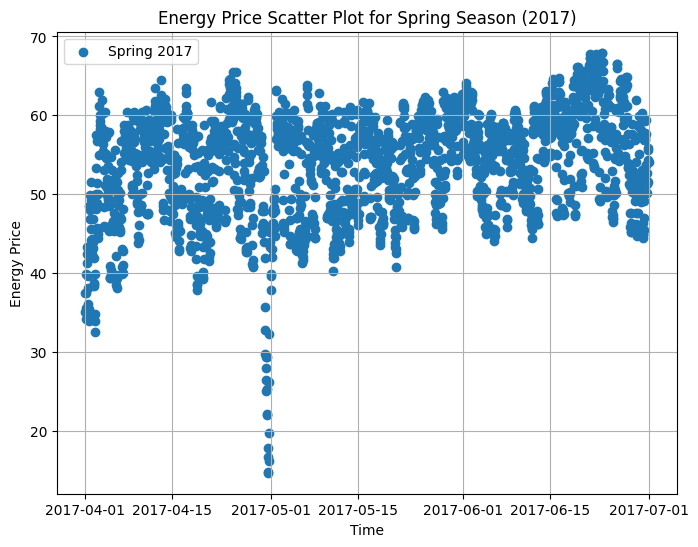

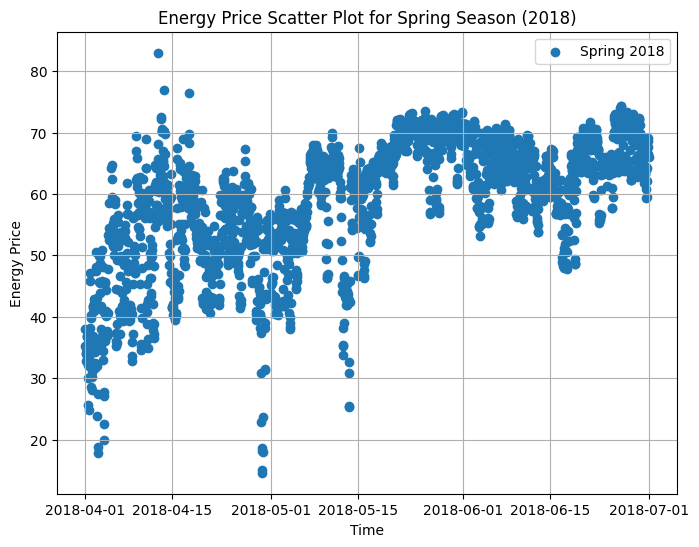

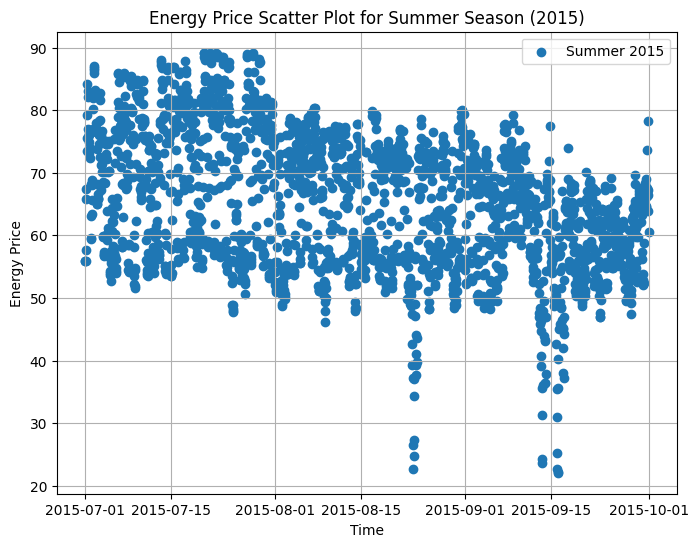

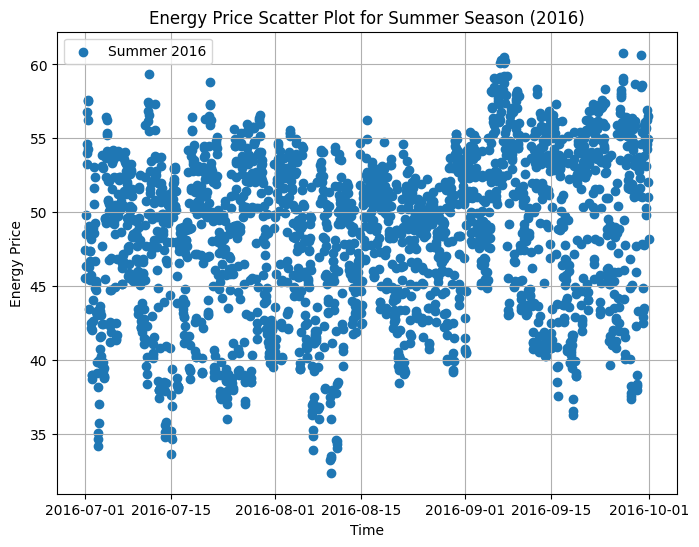

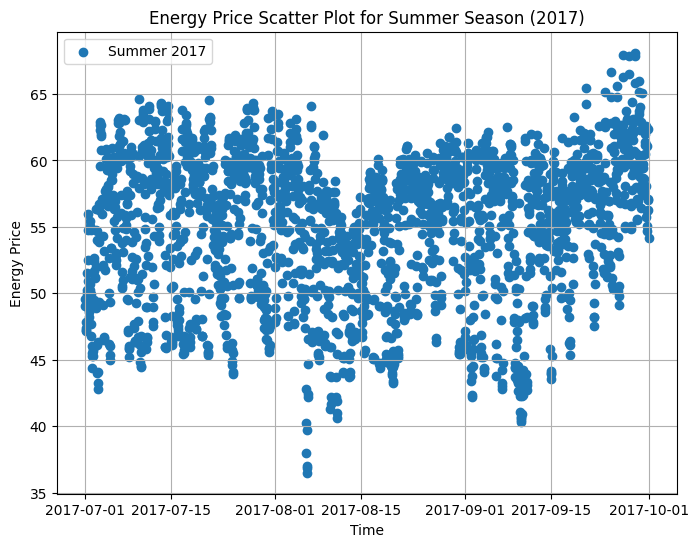

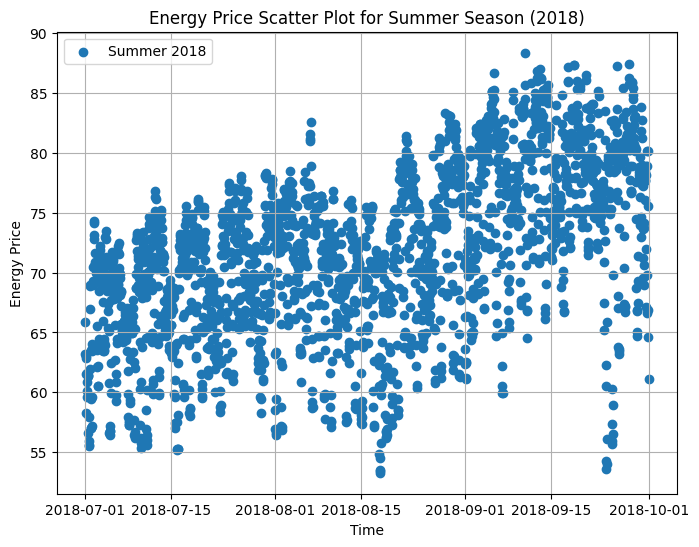

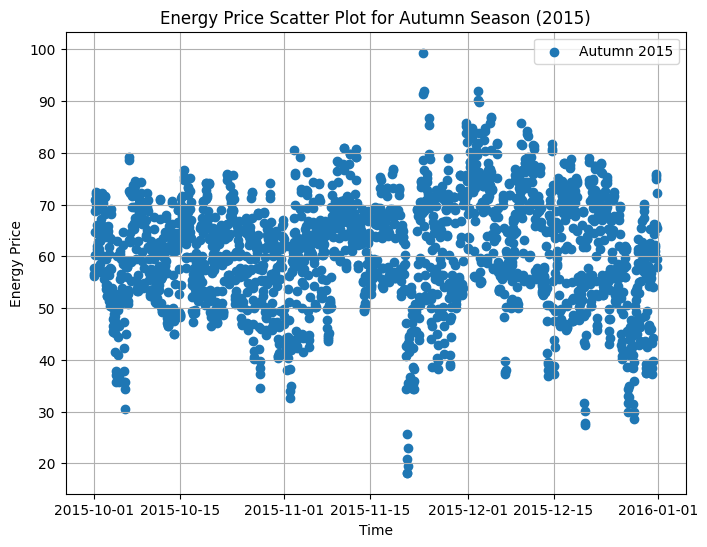

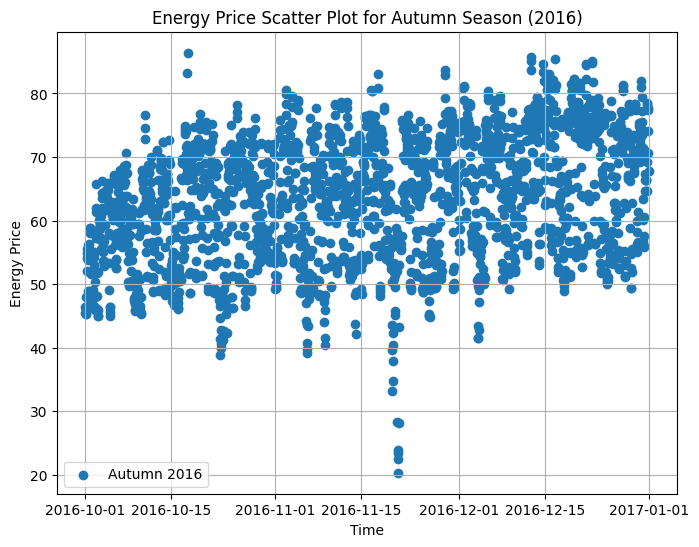

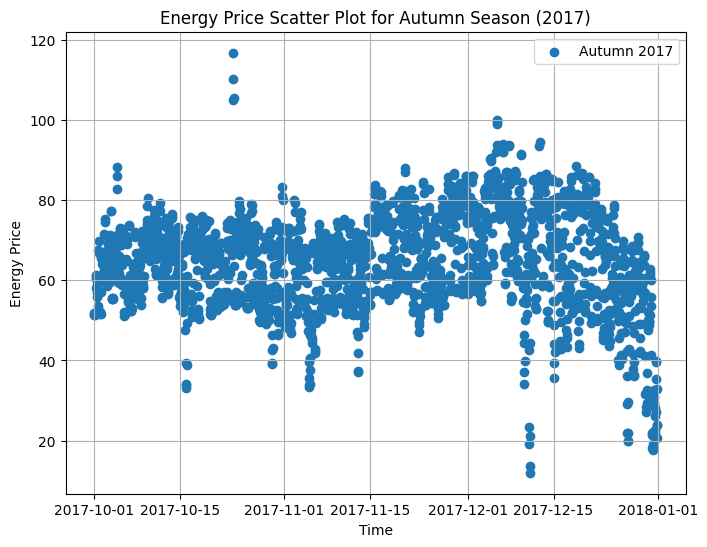

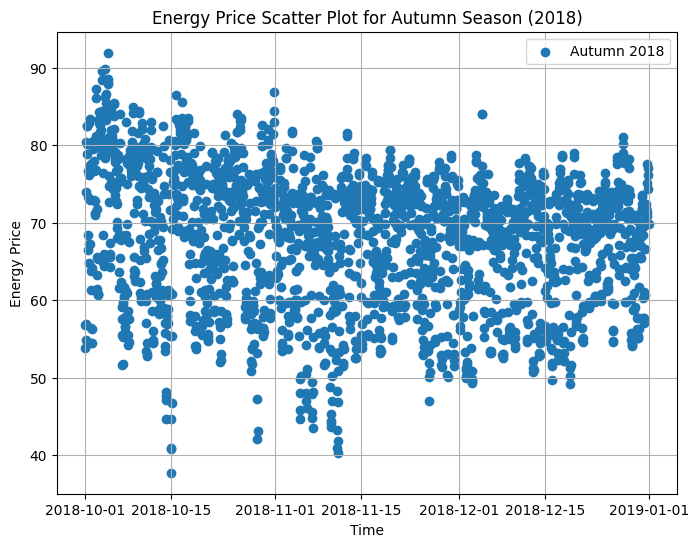

In [124]:
# Get unique seasons and years from the DataFrame
unique_seasons = df_price_prediction['seasons'].unique()
unique_years = df_price_prediction['time'].dt.year.unique()

# Create scatter plots for all combinations of seasons and years
for season in unique_seasons:
    for year in unique_years:
        season_year_data = df_price_prediction[(df_price_prediction['seasons'] == season) & (df_price_prediction['time'].dt.year == year)]

        if not season_year_data.empty:
            plt.figure(figsize=(8, 6))
            plt.scatter(season_year_data['time'], season_year_data['price actual'], label=f'{season} {year}', marker='o')
            plt.title(f'Energy Price Scatter Plot for {season} Season ({year})')
            plt.xlabel('Time')
            plt.ylabel('Energy Price')
            plt.grid(True)
            plt.legend()
            plt.show()

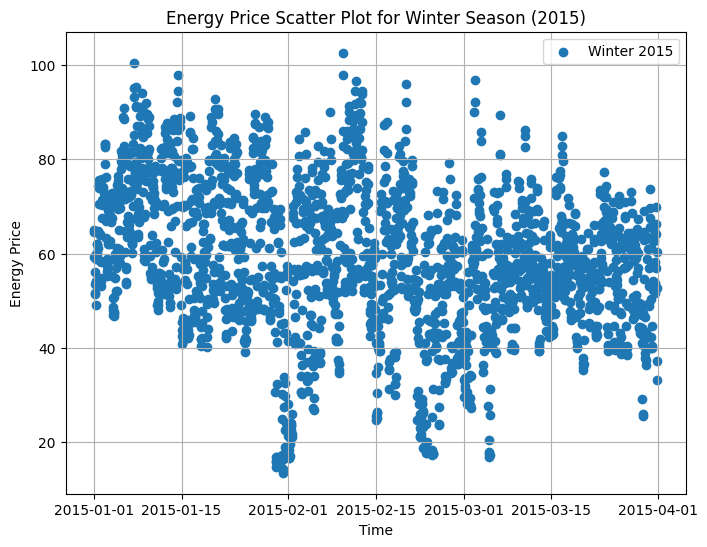

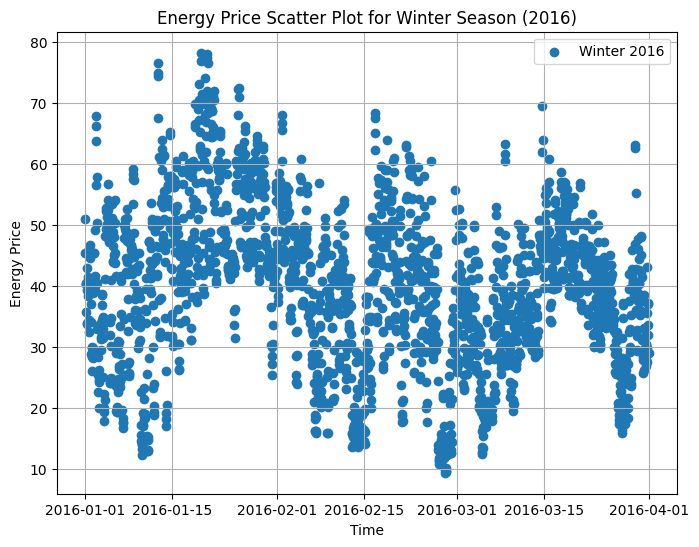

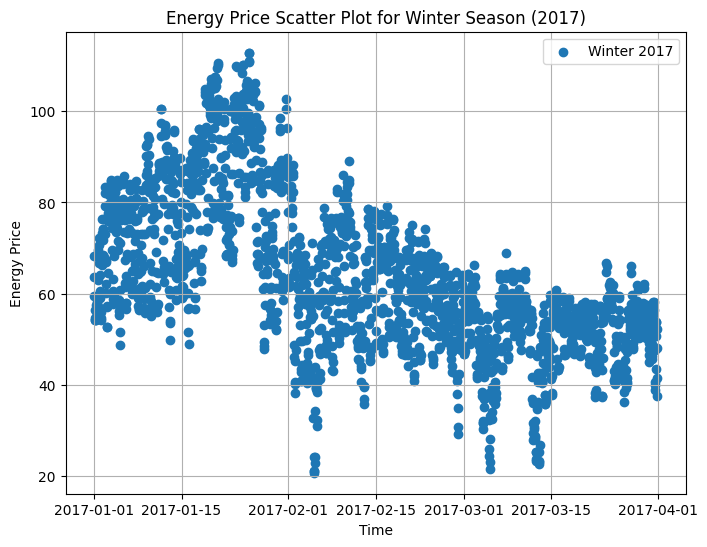

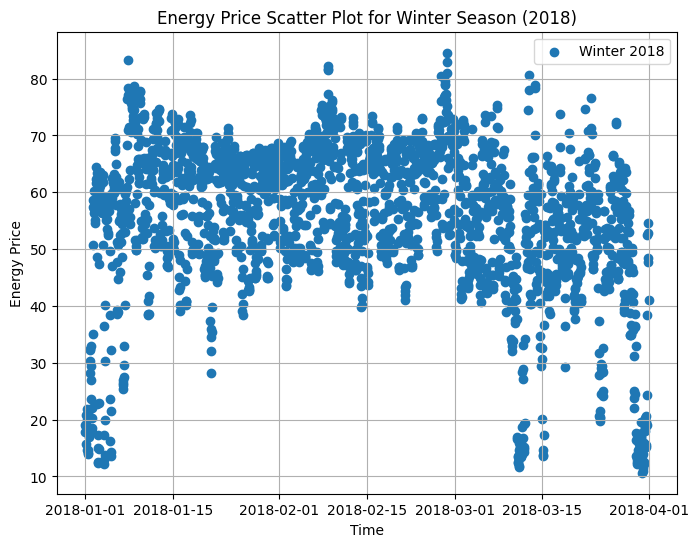

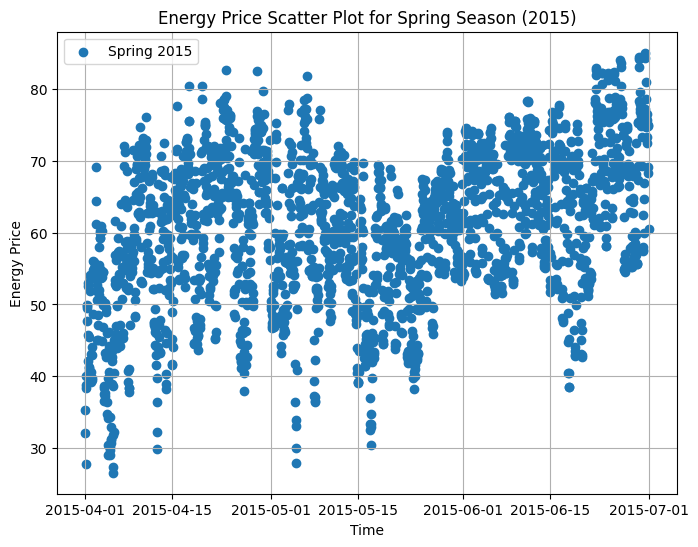

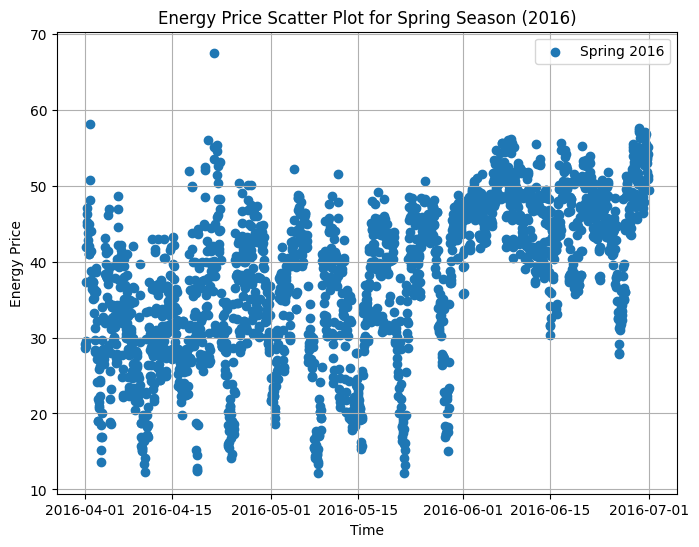

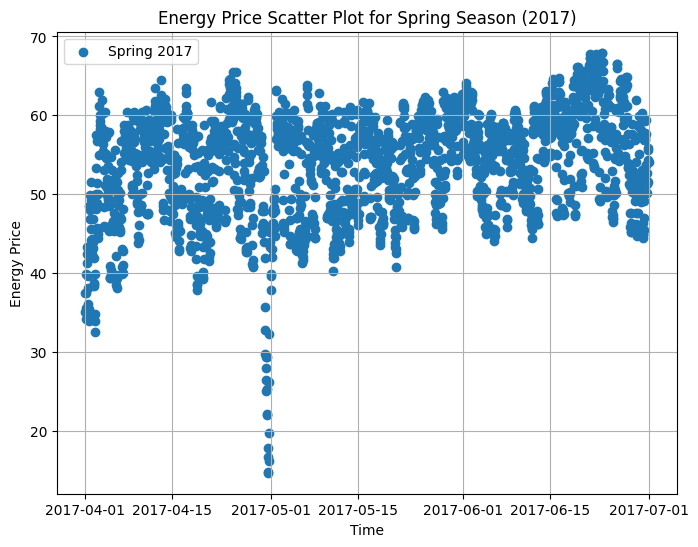

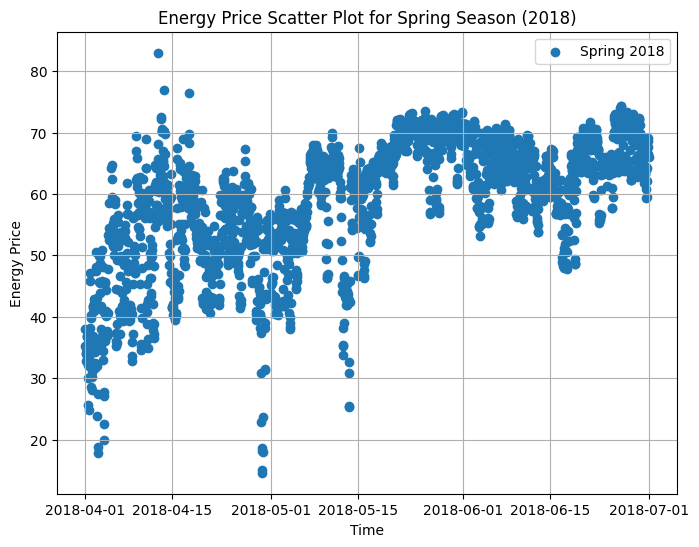

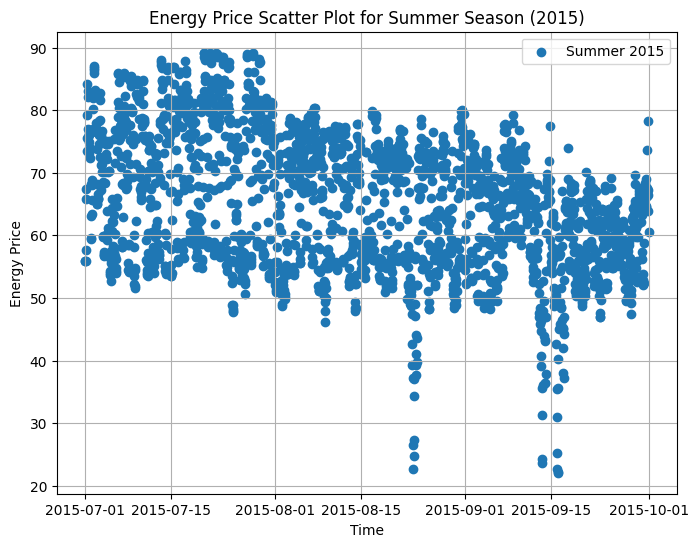

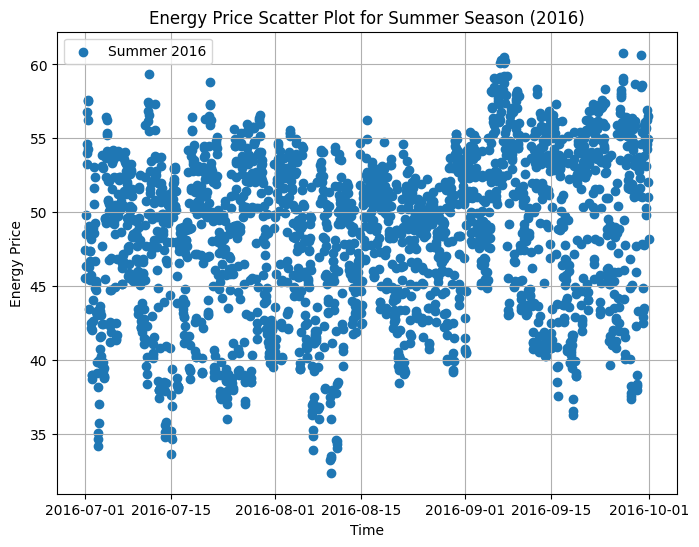

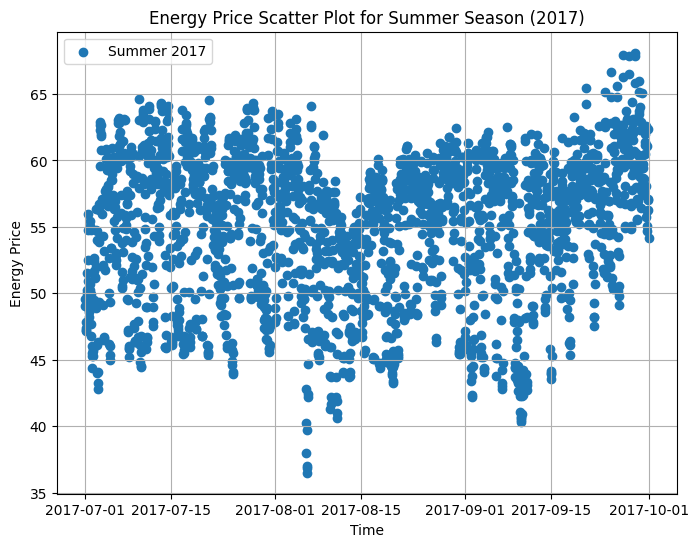

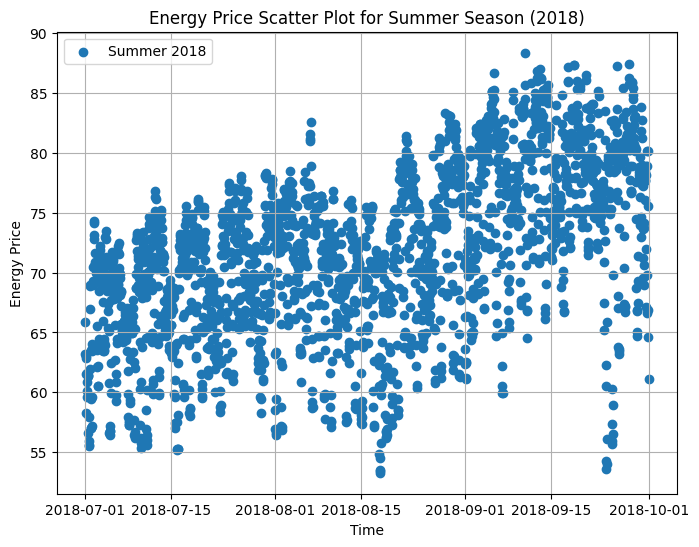

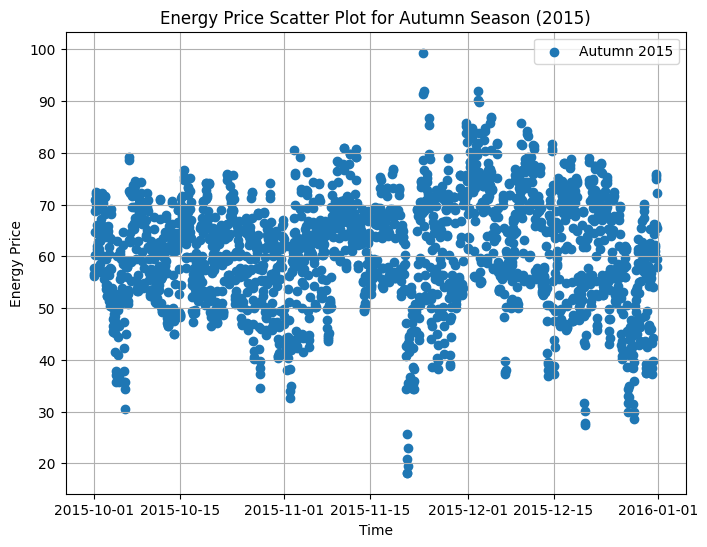

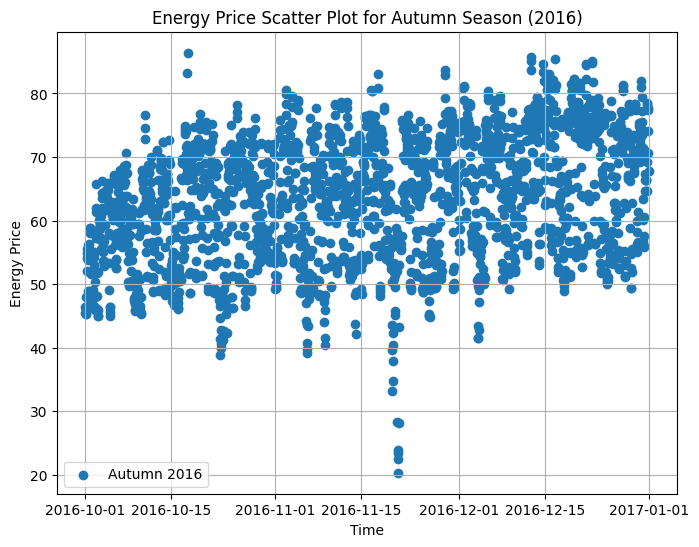

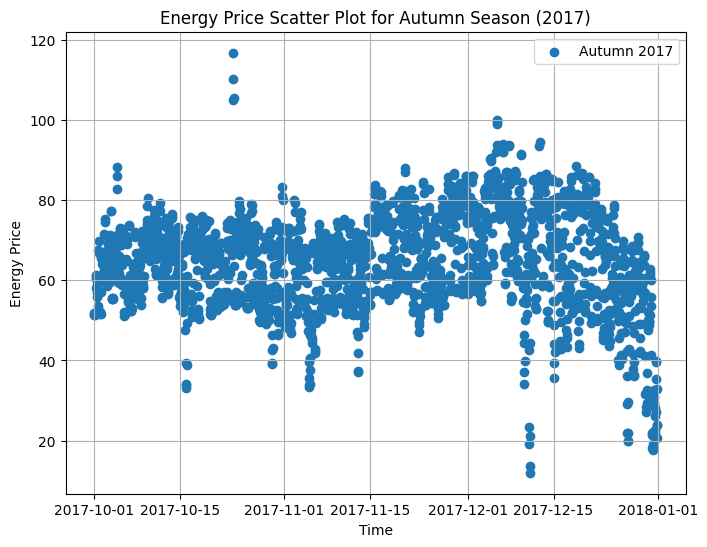

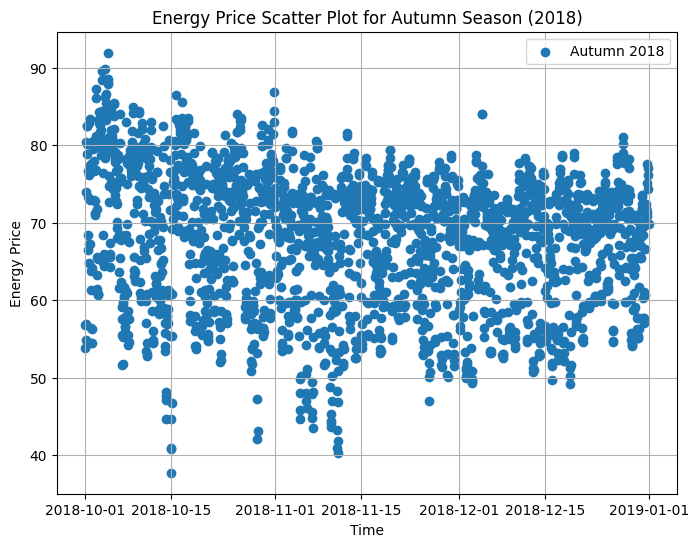

In [125]:
# Get unique seasons and years from the DataFrame
unique_seasons = df_price_prediction['seasons'].unique()
unique_years = df_price_prediction['time'].dt.year.unique()

# Create scatter plots for all combinations of seasons and years
for season in unique_seasons:
    for year in unique_years:
        season_year_data = df_price_prediction[(df_price_prediction['seasons'] == season) & (df_price_prediction['time'].dt.year == year)]

        if not season_year_data.empty:
            plt.figure(figsize=(8, 6))
            plt.scatter(season_year_data['time'], season_year_data['price actual'], label=f'{season} {year}', marker='o')
            plt.title(f'Energy Price Scatter Plot for {season} Season ({year})')
            plt.xlabel('Time')
            plt.ylabel('Energy Price')
            plt.grid(True)
            plt.legend()
            plt.show()

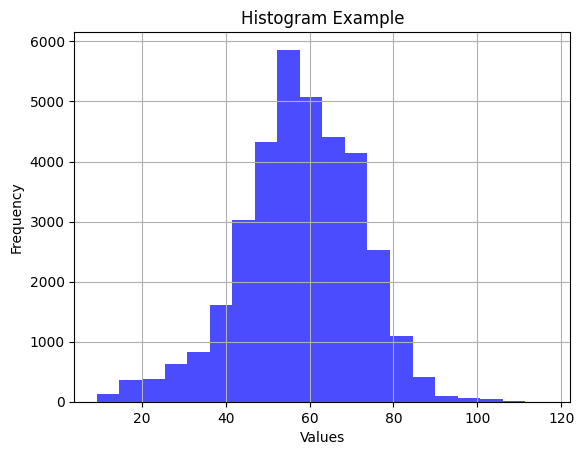

In [126]:
# data = np.random.randn(1000)  # Sample data

# Create a histogram
plt.hist(df_price_prediction['price actual'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.grid(True)

# Display the histogram
plt.show()

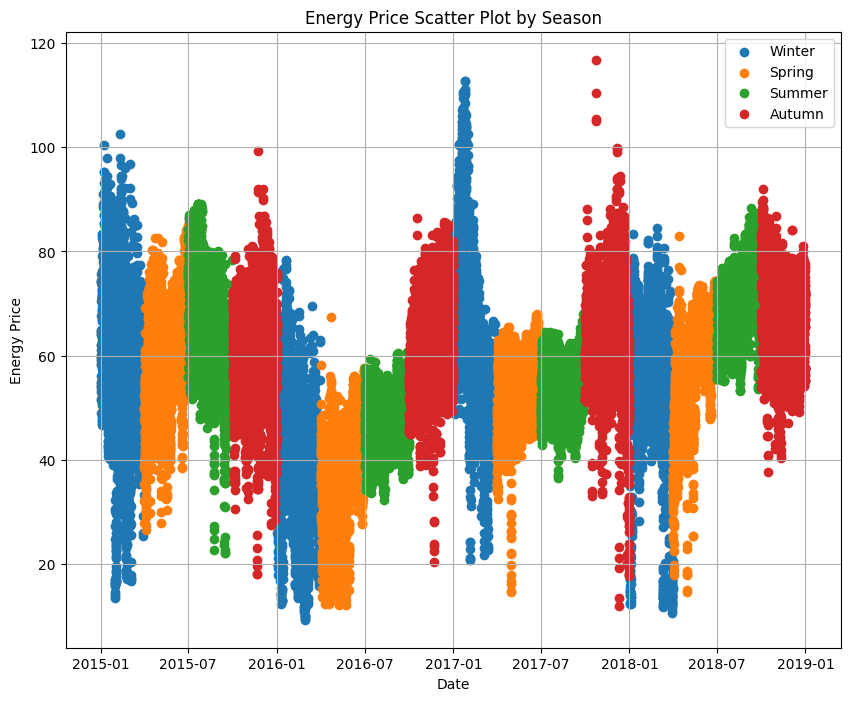

In [127]:
unique_seasons = df_price_prediction['seasons'].unique()

plt.figure(figsize=(10, 8))

for season in unique_seasons:
    season_data = df_price_prediction[df_price_prediction['seasons'] == season]
    
    # Use 'time' from season_data and 'price actual' from season_data
    plt.scatter(season_data['time'], season_data['price actual'], label=season, marker='o')

plt.title('Energy Price Scatter Plot by Season')
plt.xlabel('Date')
plt.ylabel('Energy Price')
plt.grid(True)
plt.legend()
plt.show()


In [128]:
mean_value = df_price_prediction['price actual'].mean()
std_value = df_price_prediction['price actual'].std()

df_price_prediction['standardized_value'] = (df_price_prediction['price actual'] - mean_value) / std_value

df_price_prediction

C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_16828\3195731082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_prediction['standardized_value'] = (df_price_prediction['price actual'] - mean_value) / std_value


time  price actual seasons  standardized_value
1     2015-01-01 00:00:00+00:00         64.92  Winter            0.495359
2     2015-01-01 01:00:00+00:00         64.48  Winter            0.464382
3     2015-01-01 02:00:00+00:00         59.32  Winter            0.101110
4     2015-01-01 03:00:00+00:00         56.04  Winter           -0.129807
5     2015-01-01 04:00:00+00:00         53.63  Winter           -0.299475
...                         ...           ...     ...                 ...
35059 2018-12-31 18:00:00+00:00         77.02  Autumn            1.347218
35060 2018-12-31 19:00:00+00:00         76.16  Autumn            1.286673
35061 2018-12-31 20:00:00+00:00         74.30  Autumn            1.155726
35062 2018-12-31 21:00:00+00:00         69.89  Autumn            0.845255
35063 2018-12-31 22:00:00+00:00         69.88  Autumn            0.844551

[35063 rows x 4 columns]

In [129]:
df_price_prediction['date'] = df_price_prediction['time'].dt.date
df_price_prediction['date'] = pd.to_datetime(df_price_prediction['date'])


C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_16828\901170639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_prediction['date'] = df_price_prediction['time'].dt.date
C:\Users\Harsh Patel\AppData\Local\Temp\ipykernel_16828\901170639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_prediction['date'] = pd.to_datetime(df_price_prediction['date'])


In [130]:
df_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35063 entries, 1 to 35063
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   time                35063 non-null  datetime64[ns, UTC]
 1   price actual        35063 non-null  float64            
 2   seasons             35063 non-null  object             
 3   standardized_value  35063 non-null  float64            
 4   date                35063 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


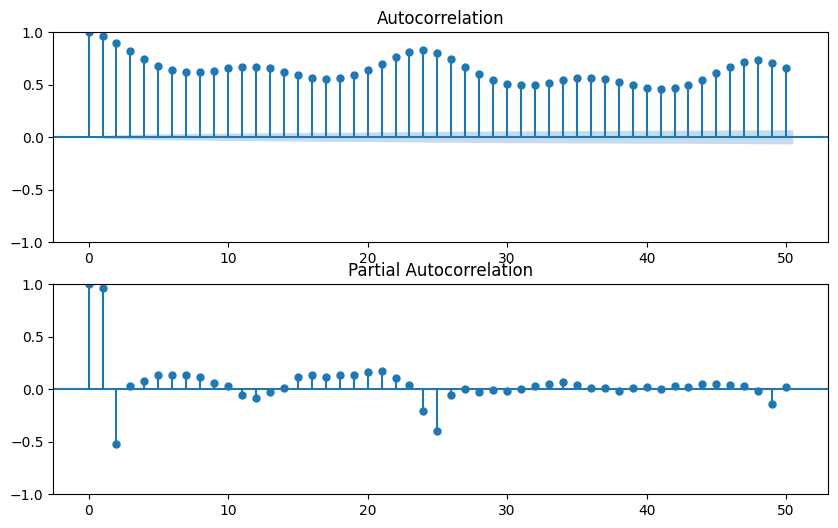

In [185]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
sm.graphics.tsa.plot_acf(df_price_prediction['standardized_value'], lags=50, ax=ax1)
sm.graphics.tsa.plot_pacf(df_price_prediction['standardized_value'], lags=50, ax=ax2)
plt.show()


In [164]:
from statsmodels.tsa.stattools import adfuller

In [179]:
result= adfuller(df_price_prediction['standardized_value'])
print(result)

(-9.148002507523834, 2.7345790612535904e-15, 50, 35012, {'1%': -3.43053678680168, '5%': -2.861622555151452, '10%': -2.5668139415123283}, -25138.358183472374)


ADF Statistic: -9.148002507523834
p-value: 2.7345790612535904e-15
Critical Values:
1%: -3.43053678680168
5%: -2.861622555151452
10%: -2.5668139415123283
Number of Lags Used: 50
Reject the null hypothesis (H0): Stationary


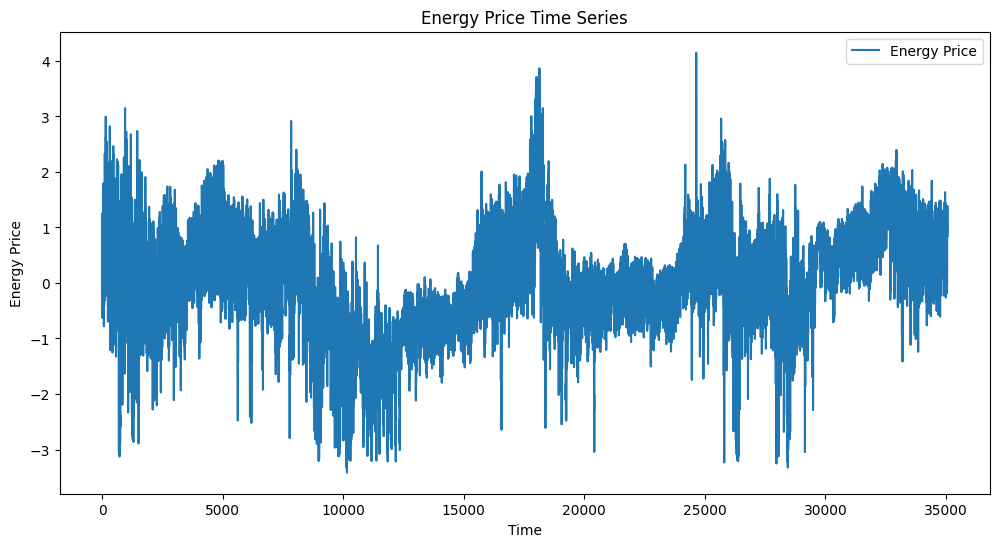

In [181]:
#H0: Non-Stationary
#H1: Stationary




# Perform the Dickey-Fuller test
result = adfuller(df_price_prediction['standardized_value'])

# Extract and print the test results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"{key}: {value}")
print("Number of Lags Used:", result[2])

# Interpret the results
if result[1] <= 0.05:
    print("Reject the null hypothesis (H0): Stationary")
else:
    print("Fail to reject the null hypothesis (H0): Non-Stationary")
    
    
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_price_prediction['standardized_value'], label='Energy Price')
plt.title('Energy Price Time Series')
plt.xlabel('Time')
plt.ylabel('Energy Price')
plt.legend()



plt.show()


# Applying Machine Learning Algorithm.

In [131]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.dates as mdates

# Rand Forest Regressor

Mean Squared Error (MSE): 0.04628930732145386
Mean Absolute Error (MAE): 0.1471573258270398
R-squared (R2) Score: 0.9535334623343121


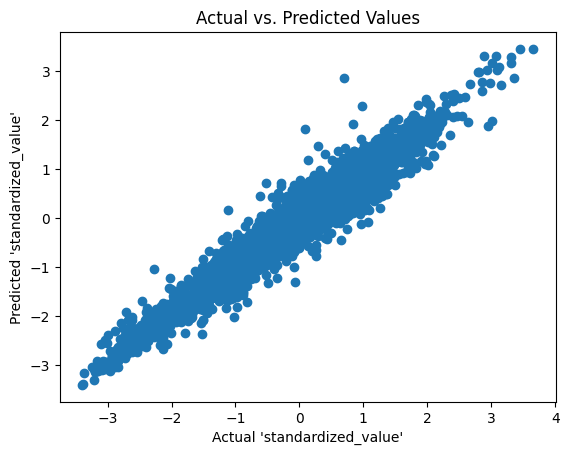

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the target variable and features
target = 'standardized_value'
X = df_price_prediction[['time']]  # Using double brackets to create a DataFrame with a single column
y = df_price_prediction[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2) Score: {r2}")

# You can also visualize the actual vs. predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual 'standardized_value'")
plt.ylabel("Predicted 'standardized_value'")
plt.title("Actual vs. Predicted Values")
plt.show()


# SARIMA Model 

In [144]:
df_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35063 entries, 1 to 35063
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   time                35063 non-null  datetime64[ns, UTC]
 1   price actual        35063 non-null  float64            
 2   seasons             35063 non-null  object             
 3   standardized_value  35063 non-null  float64            
 4   date                35063 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


In [145]:
train_size = int(len(df_price_prediction) * 0.8)  # 80% for training
train_data = df_price_prediction.iloc[:train_size]
test_data = df_price_prediction.iloc[train_size:]


In [216]:
p, d, q = 1, 0, 1  # ARIMA parameters
P, D, Q, s = 1, 0, 1, 7  # Seasonal parameters (e.g., weekly seasonality)


In [217]:
model = SARIMAX(train_data['standardized_value'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = model.fit()

C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [218]:
forecast_steps = len(test_data)
sarima_forecast = sarima_results.get_forecast(steps=forecast_steps)
sarima_mean = sarima_forecast.predicted_mean
sarima_conf_int = sarima_forecast.conf_int()


C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [219]:
mse = mean_squared_error(test_data['standardized_value'], sarima_mean)
mae = mean_absolute_error(test_data['standardized_value'], sarima_mean)
#mape = np.mean(np.abs((test_data['standardized_value'] - sarima_mean) / actual_values)) * 100
mape = (1 / len(test_data['standardized_value'])) * np.sum(np.abs((test_data['standardized_value'] - sarima_mean) / test_data['standardized_value']))

rmse = np.sqrt(mse)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 0.9551414720560567
MAE: 0.8018023755329199
MAPE: 1.0092674757433588%


In [227]:
df_price_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35063 entries, 1 to 35063
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   time                35063 non-null  datetime64[ns, UTC]
 1   price actual        35063 non-null  float64            
 2   seasons             35063 non-null  object             
 3   standardized_value  35063 non-null  float64            
 4   date                35063 non-null  datetime64[ns]     
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(2), object(1)
memory usage: 1.6+ MB


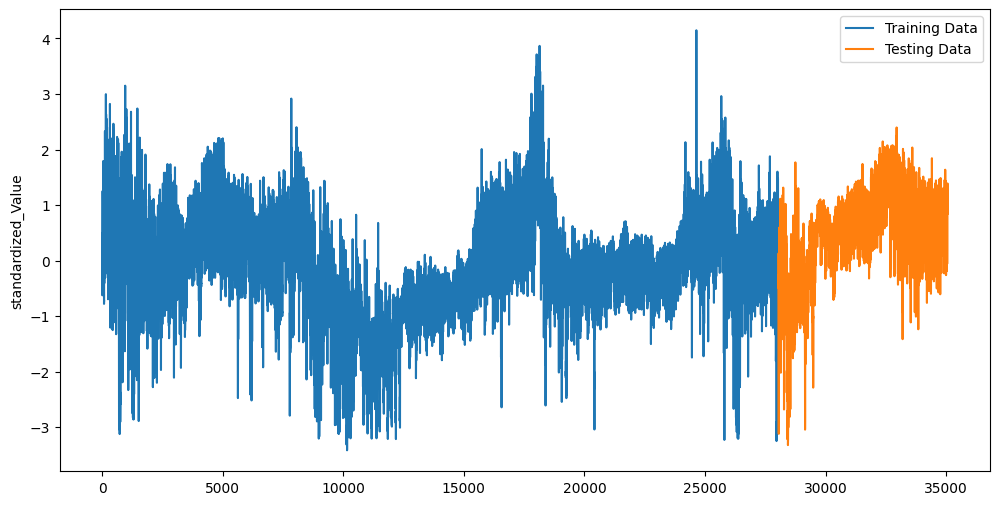

In [236]:
plt.figure(figsize=(12, 6))
plt.plot( train_data['standardized_value'], label='Training Data')
plt.plot( test_data['standardized_value'], label='Testing Data')
#plt.xlabel()
plt.ylabel('standardized_Value')
plt.legend()
plt.show()

# ARIMA Model 

In [151]:
from statsmodels.tsa.arima.model import ARIMA


In [152]:
model = ARIMA(train_data['standardized_value'], order=(p, d, q))
arima_results = model.fit()

# Forecast using ARIMA
forecast_steps = len(test_data)
arima_forecast = arima_results.get_forecast(steps=forecast_steps)
arima_mean = arima_forecast.predicted_mean


C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Harsh Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [223]:
mse = mean_squared_error(test_data['standardized_value'], arima_mean)
mae = mean_absolute_error(test_data['standardized_value'], arima_mean)
#mape = np.mean(np.abs((test_data['standardized_value'] - sarima_mean) / actual_values)) * 100
mape = (1 / len(test_data['standardized_value'])) * np.sum(np.abs((test_data['standardized_value'] - arima_mean) / test_data['standardized_value']))

rmse = np.sqrt(mse)


print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 2.8341430129496032
MAE: 2.727421718787381
MAPE: 15.871368010616163%


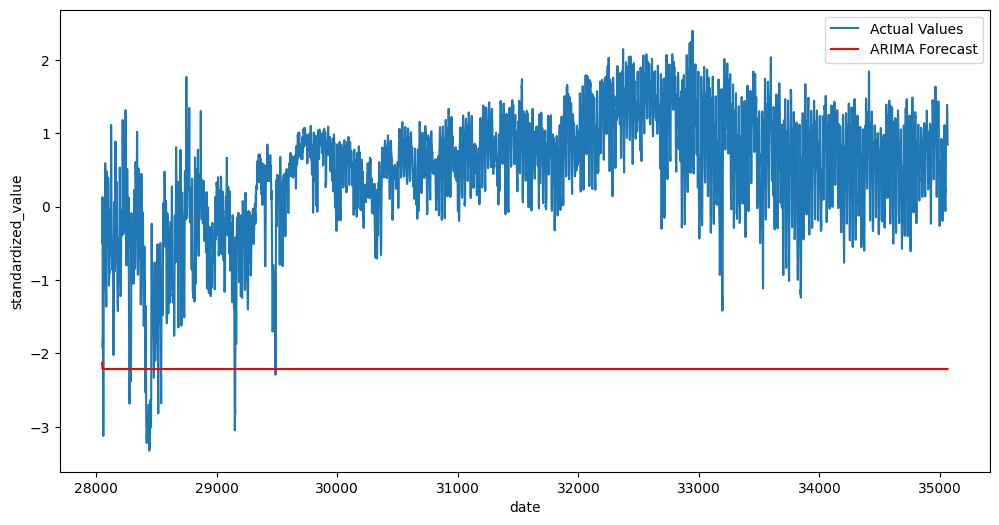

In [224]:
plt.figure(figsize=(12, 6))
plt.plot(test_data['standardized_value'], label='Actual Values')
plt.plot(arima_mean, color='red', label='ARIMA Forecast')
plt.xlabel('date')
plt.ylabel('standardized_value')
plt.legend()
plt.show()